<a href="https://colab.research.google.com/github/itsTIMUS/colab-projects/blob/main/ML/maskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [4]:
import zipfile
import os

# Extract the zip file
with zipfile.ZipFile('archive (10).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/face_mask_dataset')

print("✅ Extraction completed!")

# Check what's inside
print("\nContents of extracted folder:")
for item in os.listdir('/content/face_mask_dataset'):
    print(f"📁 {item}")

✅ Extraction completed!

Contents of extracted folder:
📁 data


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/face_mask_dataset/data/with_mask')
print(with_mask_files[0:5])
without_mask_files = os.listdir('/content/face_mask_dataset/data/without_mask')
print(without_mask_files[0:5])

['with_mask_1136.jpg', 'with_mask_208.jpg', 'with_mask_994.jpg', 'with_mask_1981.jpg', 'with_mask_3003.jpg']
['without_mask_1971.jpg', 'without_mask_2253.jpg', 'without_mask_1136.jpg', 'without_mask_80.jpg', 'without_mask_2949.jpg']


In [9]:
print('with mask:', len(with_mask_files))
print('without mask:', len(without_mask_files))

with mask: 3725
without mask: 3828


In [12]:
#creating labels for the two class
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


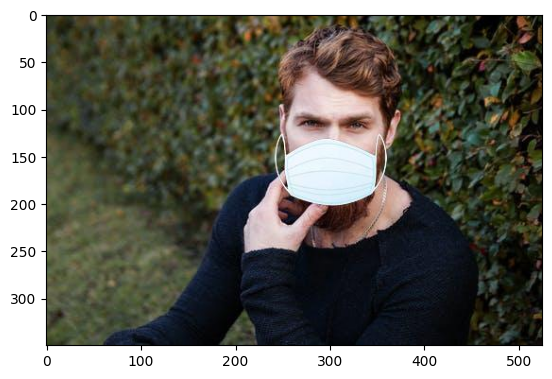

In [15]:
#displaying the images  with mask
img = mpimg.imread('/content/face_mask_dataset/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

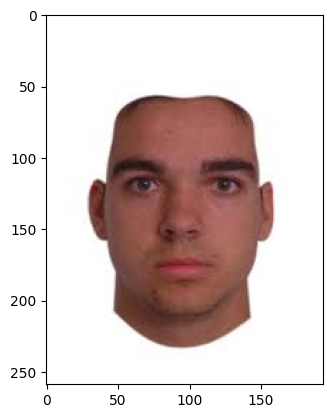

In [16]:
#displaying the images  withoyt mask
img = mpimg.imread('/content/face_mask_dataset/data/without_mask/without_mask_2253.jpg')
imgplot = plt.imshow(img)
plt.show()

In [17]:
#image processing
with_mask_path = '/content/face_mask_dataset/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/face_mask_dataset/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
len(data)

7553

array([[[ 39,  34,  40],
        [ 38,  33,  39],
        [ 36,  33,  38],
        ...,
        [234, 235, 229],
        [234, 235, 229],
        [234, 235, 229]],

       [[ 43,  37,  43],
        [ 40,  35,  41],
        [ 39,  34,  40],
        ...,
        [234, 235, 229],
        [234, 235, 229],
        [234, 235, 229]],

       [[ 41,  34,  41],
        [ 39,  33,  40],
        [ 38,  32,  39],
        ...,
        [234, 235, 229],
        [234, 235, 229],
        [234, 235, 229]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 254, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 255]]], dtype=uint8)
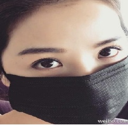

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#converting image list and labels to array
x= np.array(data)
y= np.array(labels)

In [24]:
type(y)

numpy.ndarray

In [25]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [27]:
print(x_train.shape)
print(x_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [28]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [29]:
#building CNN
import tensorflow as tf
from tensorflow import keras

In [53]:
num_of_class = 2

# Setting up the layer of neural networks
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# CORRECTED: Use 1 unit with sigmoid for binary classification
model.add(keras.layers.Dense(num_of_class, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [55]:
# Train the model
history = model.fit(
    x_train_scaled,
    y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,  # Add batch size for better training
    verbose=1       # Add verbose to see training progress
)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - acc: 0.7025 - loss: 0.6876 - val_acc: 0.8876 - val_loss: 0.3005
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - acc: 0.8863 - loss: 0.3053 - val_acc: 0.9124 - val_loss: 0.2202
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9044 - loss: 0.2403 - val_acc: 0.9124 - val_loss: 0.2254
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9210 - loss: 0.1896 - val_acc: 0.9223 - val_loss: 0.2170
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9373 - loss: 0.1611 - val_acc: 0.9223 - val_loss: 0.2106
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9462 - loss: 0.1368 - val_acc: 0.9306 - val_loss: 0.2230
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9499 - loss: 0.1244 - val_acc: 0.9289 - val_loss: 0.2291
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9661 - loss: 0.0848 - val_acc: 0.9223 - val_loss: 0.2198
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/

In [47]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test accuracy:', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.4969 - loss: nan
Test accuracy: 0.508272647857666


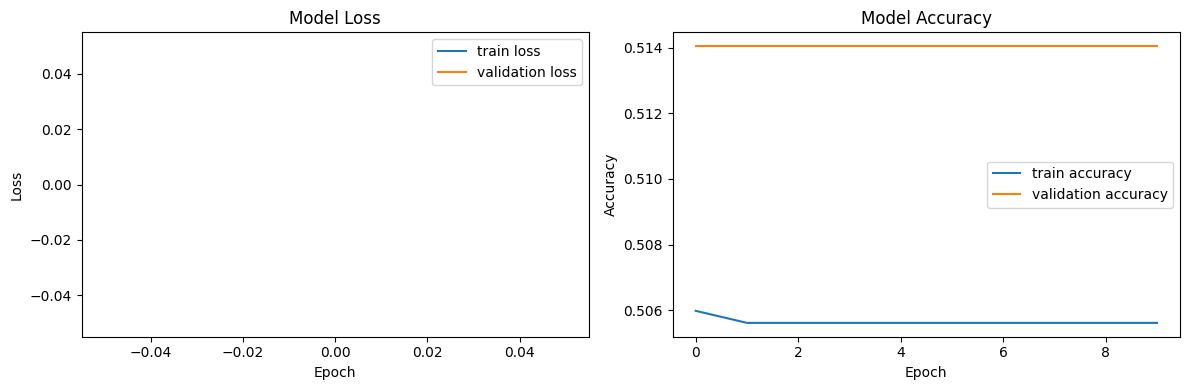

In [48]:
h = history

# Plot the loss function value
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy value (fixed keys)
plt.subplot(1, 2, 2)
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Enter the path of the image: /content/testnomask.jpg


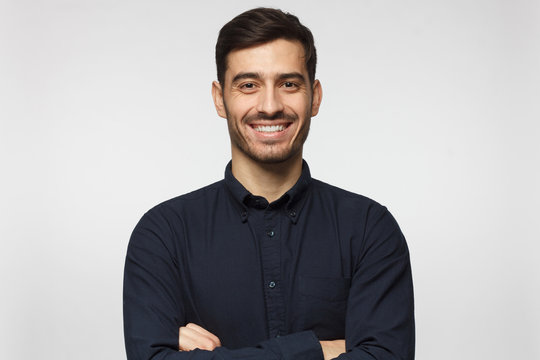

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[nan]]
0
The person in the image is not wearing a mask


In [52]:
#predictive system
input_image_path = input('Enter the path of the image: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')